# **Objective: Predict fish toxicity (LC50 values) based on chemical descriptors using machine learning models**

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting graphs and charts

# Data splitting and cross-validation
from sklearn.model_selection import train_test_split, cross_val_score

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR  # Support Vector Regression model
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regression model
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regression model

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

# For feature scaling
from sklearn.preprocessing import StandardScaler

# PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Import necessary libraries for classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
#from sklearn.experimental import enable_hist_gradient_boosting  # noqa
#from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, KMeans, MeanShift
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

# For handling warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings to maintain clean output


In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r'D:\qsar_fish_toxicity.csv')

# Display the first few rows and last few rows of the DataFrame
print(df.head())
print(df.tail())


    CIC0  SM1_Dz(Z)  GATS1i  NdsCH  NdssC  MLOGP  LC50 [-LOG(mol/L)]
0  3.260      0.829   1.676    0.0      1  1.453               3.770
1  2.189      0.580   0.863    0.0      0  1.348               3.115
2  2.125      0.638   0.831    0.0      0  1.348               3.531
3  3.027      0.331   1.472    1.0      0  1.807               3.510
4  2.094      0.827   0.860    0.0      0  1.886               5.390
      CIC0  SM1_Dz(Z)  GATS1i  NdsCH  NdssC  MLOGP  LC50 [-LOG(mol/L)]
903  2.801      0.728   2.226    0.0      2  0.736               3.109
904  3.652      0.872   0.867    2.0      3  3.983               4.040
905  3.763      0.916   0.878    0.0      6  2.918               4.818
906  2.831      1.393   1.077    0.0      1  0.906               5.317
907  4.057      1.032   1.183    1.0      3  4.754               8.201


**CIC0: Ranges from approximately 2.094 to 3.260 with a mean around 2.739.**

**SM1_Dz(Z): Values range from 0.331 to 0.829, indicating relatively low variation.**

**GATS1i: Ranges from 0.831 to 1.676, with an average around 1.140.**

**NdsCH: Appears to be mostly 0, indicating it might be a binary or categorical variable.**

**NdssC: Similarly, mostly 0 with some values of 1.**

**MLOGP: Ranges from 1.348 to 1.886, with an average of approximately 1.569.**

**LC50 [-LOG(mol/L)]: Shows a wide range from 3.115 to 5.390, with a mean around 3.863.**

In [3]:
# Rename the column 'LC50 [-LOG(mol/L)]' to 'LC50'
df.rename(columns={'LC50 [-LOG(mol/L)]': 'LC50'}, inplace=True)


In [4]:
# Calculate number of unique values in each column
unique_counts = df.nunique()

# Print the number of unique values for each column
print("Number of unique values in each column:")
print(unique_counts)


Number of unique values in each column:
CIC0         502
SM1_Dz(Z)    186
GATS1i       556
NdsCH          5
NdssC          9
MLOGP        559
LC50         825
dtype: int64


**CIC0:Unique Values: 502
This suggests that CIC0 has a relatively high diversity of values, indicating potential variability or a wide range of chemical compositions or properties.**

**SM1_Dz(Z):Unique Values: 186
SM1_Dz(Z) has fewer unique values compared to CIC0, indicating less variability or a more constrained range of values for this feature.**

**GATS1i:
Unique Values: 556
Similar to CIC0, GATS1i also shows a high number of unique values, suggesting a wide spectrum of possible values for this chemical descriptor.**

**NdsCH:
Unique Values: 5
NdsCH has only 5 unique values, indicating it might be a categorical or binary variable with limited variation.**

**NdssC:
Unique Values: 9
NdssC has 9 unique values, suggesting it might also be a categorical variable with a few distinct categories.**

**MLOGP:
Unique Values: 559
MLOGP exhibits a large number of unique values, similar to GATS1i and CIC0, indicating potentially diverse molecular properties or compositions.**

**LC50:
Unique Values: 825
LC50 has the highest number of unique values among all columns, suggesting a broad range of toxicity levels or concentrations, which is typical in toxicity studies where the response variable can vary widely across different substances.**


In [5]:
# Retrieve the dimensions (number of rows and columns) of the DataFrame
df_shape = df.shape

# Print the dimensions of the DataFrame
print("Shape of the DataFrame (rows, columns):", df_shape)

Shape of the DataFrame (rows, columns): (908, 7)


**Data Size:
With 908 observations (rows), you have a decent amount of data to work with for analysis and modeling tasks. This size allows for reliable statistical inference and machine learning model training.**

**Feature Dimensionality:
Having 7 columns indicates you are working with 7 different features or variables. Understanding the nature and relationships between these features will be crucial for data exploration and modeling.**

In [6]:
# Generate descriptive statistics and transpose the result
df_desc = df.describe().T

# Print the transposed descriptive statistics
print("Descriptive statistics of numerical columns:")
print(df_desc)

Descriptive statistics of numerical columns:
           count      mean       std    min      25%     50%      75%     max
CIC0       906.0  2.898620  0.756221  0.667  2.34875  2.9340  3.40700   5.926
SM1_Dz(Z)  906.0  0.628595  0.428775  0.000  0.22300  0.5700  0.89625   2.171
GATS1i     906.0  1.297135  0.412765  0.396  0.95025  1.2405  1.56275   4.980
NdsCH      907.0  0.229327  0.605621  0.000  0.00000  0.0000  0.00000   4.000
NdssC      908.0  0.504405  1.083596 -3.000  0.00000  0.0000  1.00000  20.000
MLOGP      905.0  2.113989  1.480015 -5.780  1.20900  2.1270  3.10900  10.000
LC50       906.0  4.063213  1.457018  0.053  3.15125  3.9840  4.91050   9.612


**CIC0:
Mean: 2.898620, Standard Deviation: 0.756221
Range: From a minimum of 0.667 to a maximum of 5.926
Distribution: Fairly spread out with a mean close to 3, indicating a moderate variation in chemical composition.**

**SM1_Dz(Z):
Mean: 0.628595, Standard Deviation: 0.428775
Range: From 0.000 to 2.171
Distribution: Skewed towards lower values with a significant spread, suggesting a diverse set of molecular properties.**

**GATS1i:
Mean: 1.297135, Standard Deviation: 0.412765
Range: From 0.396 to 4.980
Distribution: Moderate spread with a mean around 1.3, indicating variability in topological molecular descriptors.**

**NdsCH:
Mean: 0.229327, Standard Deviation: 0.605621
Range: From 0.000 to 4.000
Distribution: Skewed towards lower values, possibly indicating a mostly binary or categorical variable.**

**NdssC:
Mean: 0.504405, Standard Deviation: 1.083596
Range: From -3.000 to 20.000
Distribution: Has negative values and a wide range, suggesting varied chemical substructure characteristics.**

**MLOGP:
Mean: 2.113989, Standard Deviation: 1.480015
Range: From -5.780 to 10.000
Distribution: Wide spread with a mean around 2.1, indicating diverse molecular hydrophobicity characteristics.**

**LC50:
Mean: 4.063213, Standard Deviation: 1.457018
Range: From 0.053 to 9.612
Distribution: Moderate spread with a mean around 4.06, representing toxicity levels with a broad range.**

**Insights:**

**Data Range and Distribution: Each numerical column shows a different range and distribution of values, suggesting diverse chemical and toxicological characteristics in the dataset.**

**Potential Outliers: Columns like NdssC with negative values and wide ranges (MLOGP, LC50) might have outliers that could affect model performance and require careful preprocessing.**

**Feature Importance: Understanding the significance of each feature (CIC0, SM1_Dz(Z), GATS1i, etc.) in relation to predicting LC50 is crucial. Features with higher variance or strong correlations with LC50 may have more predictive power.**

**Modeling Considerations: Given the diverse ranges and distributions, consider scaling features appropriately (e.g., standardization) before fitting models like regression or machine learning algorithms.**

In [7]:
# Display information about the DataFrame
print("Information about the DataFrame:")
df.info()

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CIC0       906 non-null    float64
 1   SM1_Dz(Z)  906 non-null    float64
 2   GATS1i     906 non-null    float64
 3   NdsCH      907 non-null    float64
 4   NdssC      908 non-null    int64  
 5   MLOGP      905 non-null    float64
 6   LC50       906 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 49.8 KB


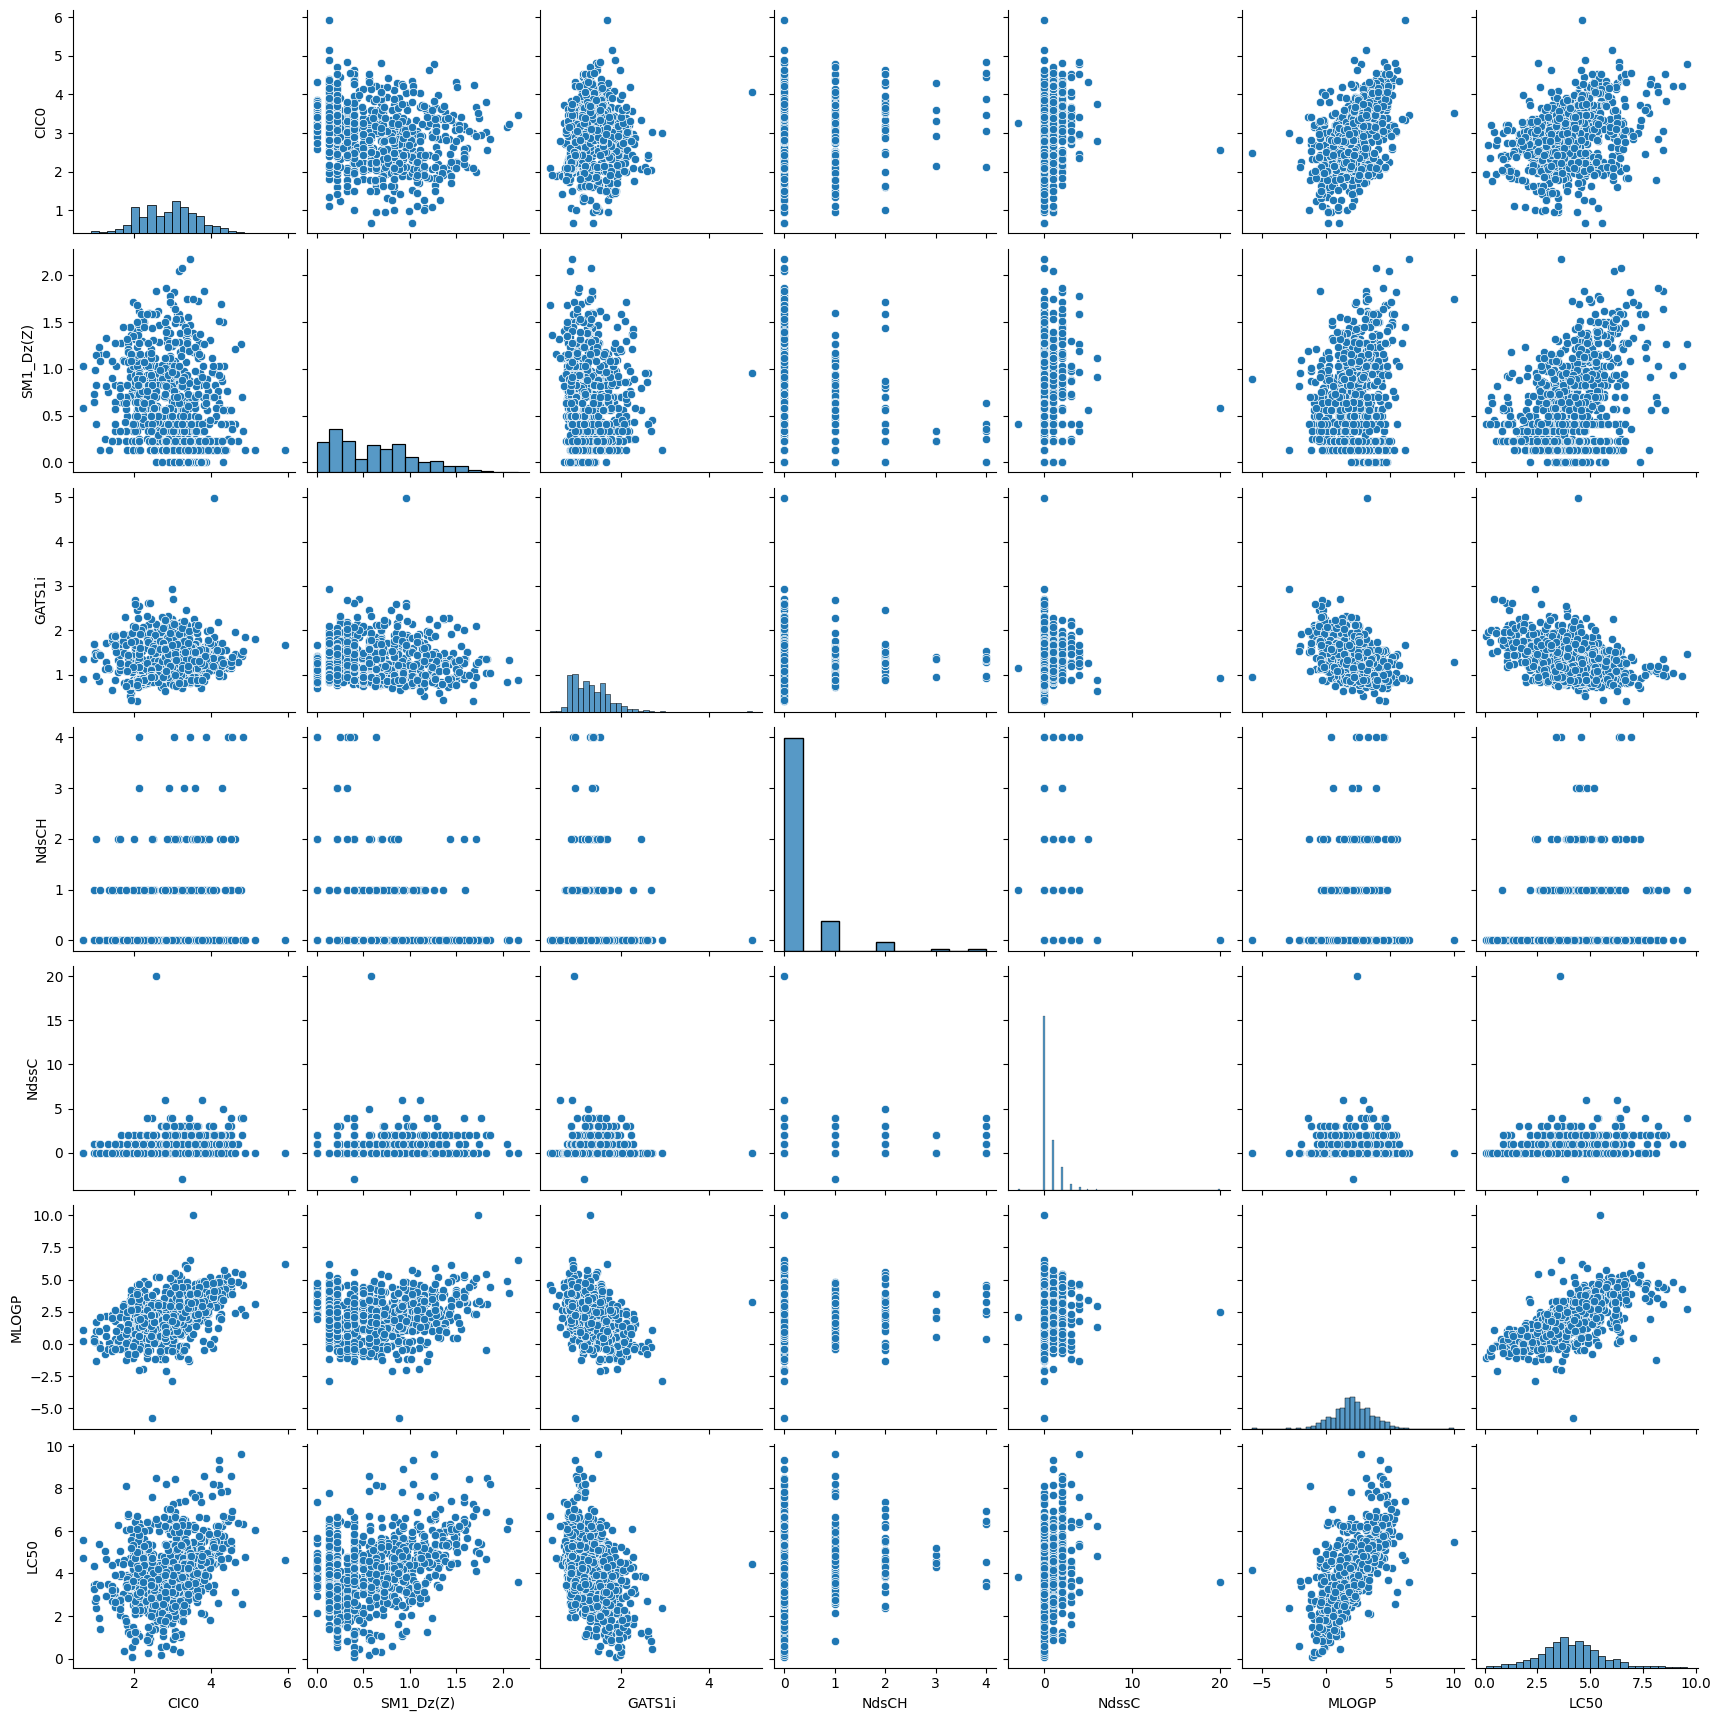

In [8]:
# Create a pairplot to visualize relationships between variables
sns.pairplot(df)

# Display the plot
plt.show()

**Insights**

**The diagonal elements of the pairplot show the distribution of each feature individually.
CIC0: Approximately normally distributed.
SM1_Dz(Z): Skewed distribution.
GATS1i: Approximately normally distributed.
NdsCH: Highly skewed with many zero values.
NdssC: Discrete values with many zeros.
MLOGP: Approximately normally distributed.
LC50: Approximately normally distributed.**

**Off-Diagonal Elements (Scatter Plots)**

**CIC0 vs LC50: There appears to be a slight negative correlation.
SM1_Dz(Z) vs LC50: A noticeable negative correlation; as SM1_Dz(Z) increases, LC50 tends to decrease.
GATS1i vs LC50: Shows some pattern suggesting a possible relationship.
NdsCH and NdssC vs LC50: Both show a scattered pattern with no clear relationship, with many zero values.
MLOGP vs LC50: A slight positive correlation is observable.
Inter-feature Relationships: Other features like CIC0 vs SM1_Dz(Z), MLOGP vs CIC0, and others show some degree of correlation or patterns, indicating relationships between these features.**

**Clusters or Grouping**

**There are visible clusters or groupings in some scatter plots, which might be worth exploring further using clustering algorithms.
For example, in the scatter plots involving NdsCH and NdssC, you can see distinct groupings which are aligned with specific discrete values.**

**Outliers**

**Some scatter plots indicate the presence of outliers. For example, NdsCH and NdssC features have a few points that lie far from the majority of data points.**

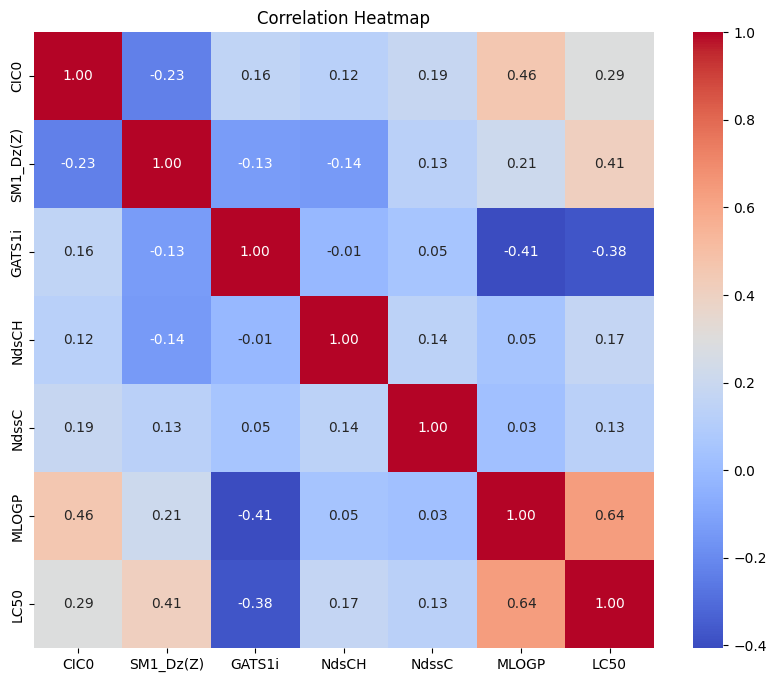

In [9]:
# Selecting columns of interest
columns_of_interest = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50']

# Creating a heatmap of correlations
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(df[columns_of_interest].corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Add a title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

**Strong Positive Correlations**

**MLOGP and LC50 (0.64): There is a strong positive correlation between MLOGP and LC50, indicating that as MLOGP increases, LC50 tends to increase as well.
CIC0 and MLOGP (0.46): There is a moderate positive correlation between CIC0 and MLOGP.**

**Moderate Positive Correlations**

**SM1_Dz(Z) and LC50 (0.41): This moderate positive correlation suggests that higher values of SM1_Dz(Z) are associated with higher values of LC50.
CIC0 and LC50 (0.29): This positive correlation is weaker but still notable.**

**Negative Correlations**


**GATS1i and MLOGP (-0.41): There is a moderate negative correlation between GATS1i and MLOGP, indicating that as GATS1i increases, MLOGP tends to decrease.
GATS1i and LC50 (-0.38): There is also a negative correlation between GATS1i and LC50, suggesting that higher values of GATS1i are associated with lower values of LC50.**

**Weak or No Significant Correlations**

**NdsCH and other features: The feature NdsCH shows very weak correlations with other features, indicating it might not be strongly related to other variables in the dataset.
NdssC and other features: Similarly, NdssC shows weak correlations with most features.**

In [10]:
# Count rows containing at least one zero in the column 'SM1_Dz(Z)'
rows_with_zero = (df['SM1_Dz(Z)'] == 0).sum()

# Print the count of rows containing zero
print("Number of rows containing zero:", rows_with_zero)

Number of rows containing zero: 36


**Prevalence of Zero Values:The presence of zero values in 36 rows suggests that certain observations in your dataset have specific features that are zero.**

**Impact on Analysis:
Zero values can affect statistical analyses, especially in scenarios where they represent meaningful measurements (e.g., absence of a chemical property) or simply missing data.**

In [11]:
# Calculate median of non-zero values in 'SM1_Dz(Z)' column
median_SM1_DzZ = df.loc[df['SM1_Dz(Z)'] != 0, 'SM1_Dz(Z)'].median()

# Replace zeroes with median in 'SM1_Dz(Z)' column
df.loc[df['SM1_Dz(Z)'] == 0, 'SM1_Dz(Z)'] = median_SM1_DzZ

# Print the updated DataFrame
print("Updated DataFrame:")
print(df)

Updated DataFrame:
      CIC0  SM1_Dz(Z)  GATS1i  NdsCH  NdssC  MLOGP   LC50
0    3.260      0.829   1.676    0.0      1  1.453  3.770
1    2.189      0.580   0.863    0.0      0  1.348  3.115
2    2.125      0.638   0.831    0.0      0  1.348  3.531
3    3.027      0.331   1.472    1.0      0  1.807  3.510
4    2.094      0.827   0.860    0.0      0  1.886  5.390
..     ...        ...     ...    ...    ...    ...    ...
903  2.801      0.728   2.226    0.0      2  0.736  3.109
904  3.652      0.872   0.867    2.0      3  3.983  4.040
905  3.763      0.916   0.878    0.0      6  2.918  4.818
906  2.831      1.393   1.077    0.0      1  0.906  5.317
907  4.057      1.032   1.183    1.0      3  4.754  8.201

[908 rows x 7 columns]


In [12]:
# Calculate the number of missing values in each column
missing = df.isnull().sum()

# Print or display the missing values counts
print("Number of missing values in each column:")
print(missing)

Number of missing values in each column:
CIC0         2
SM1_Dz(Z)    2
GATS1i       2
NdsCH        1
NdssC        0
MLOGP        3
LC50         2
dtype: int64


**Missing Data Overview:
The DataFrame contains missing values in several columns (CIC0, SM1_Dz(Z), GATS1i, NdsCH, MLOGP, LC50).
Columns NdssC appears to have no missing values, which suggests it is complete in terms of data entries.**

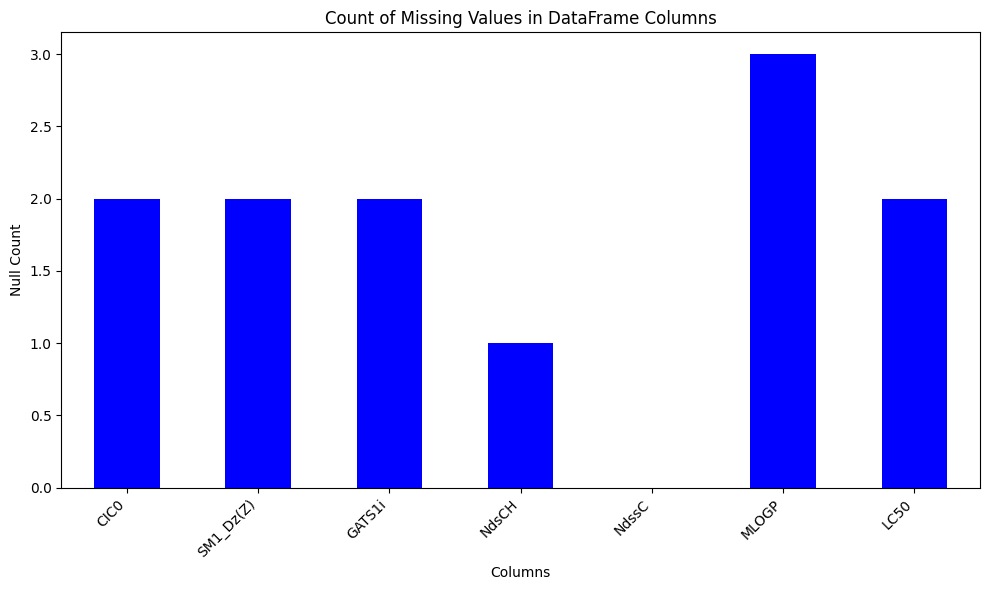

In [13]:
# Assuming 'missing' is already calculated as missing = df.isnull().sum()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot of missing values
missing.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Count of Missing Values in DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Null Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


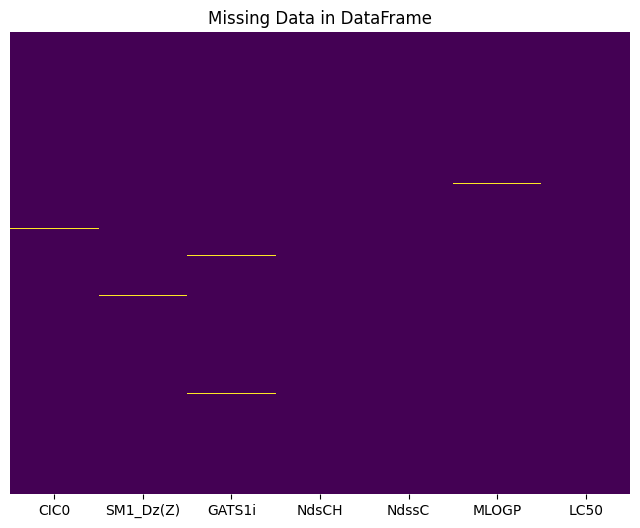

In [14]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap of missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Add title
plt.title('Missing Data in DataFrame')

# Display the plot
plt.show()

In [15]:
df = df.fillna(df.median())

In [16]:
missing = df.isnull().sum()
missing

CIC0         0
SM1_Dz(Z)    0
GATS1i       0
NdsCH        0
NdssC        0
MLOGP        0
LC50         0
dtype: int64

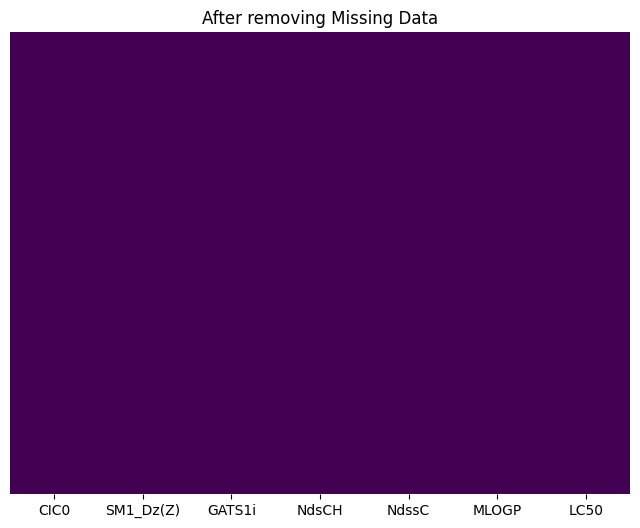

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('After removing Missing Data')
plt.show()


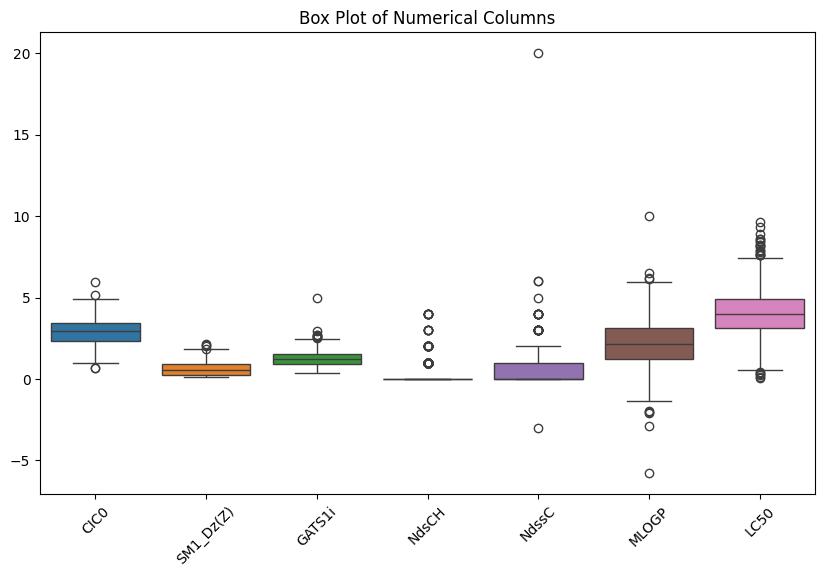

In [18]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot using Seaborn
sns.boxplot(data=df)

# Add title and adjust x-axis labels rotation
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [19]:
def remove_outliers_iqr(df):
    # Calculate Q1, Q3, and IQR
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
    
    # Count outliers before removal
    num_outliers_before = outliers.sum()
    
    # Remove outliers
    df_no_outliers = df[~outliers]
    
    return df_no_outliers, num_outliers_before

# Apply function to DataFrame and get results
df_no_outliers, num_outliers_before = remove_outliers_iqr(df)

# Print number of outliers before removal
print("Number of outliers before removal:", num_outliers_before)


Number of outliers before removal: 202


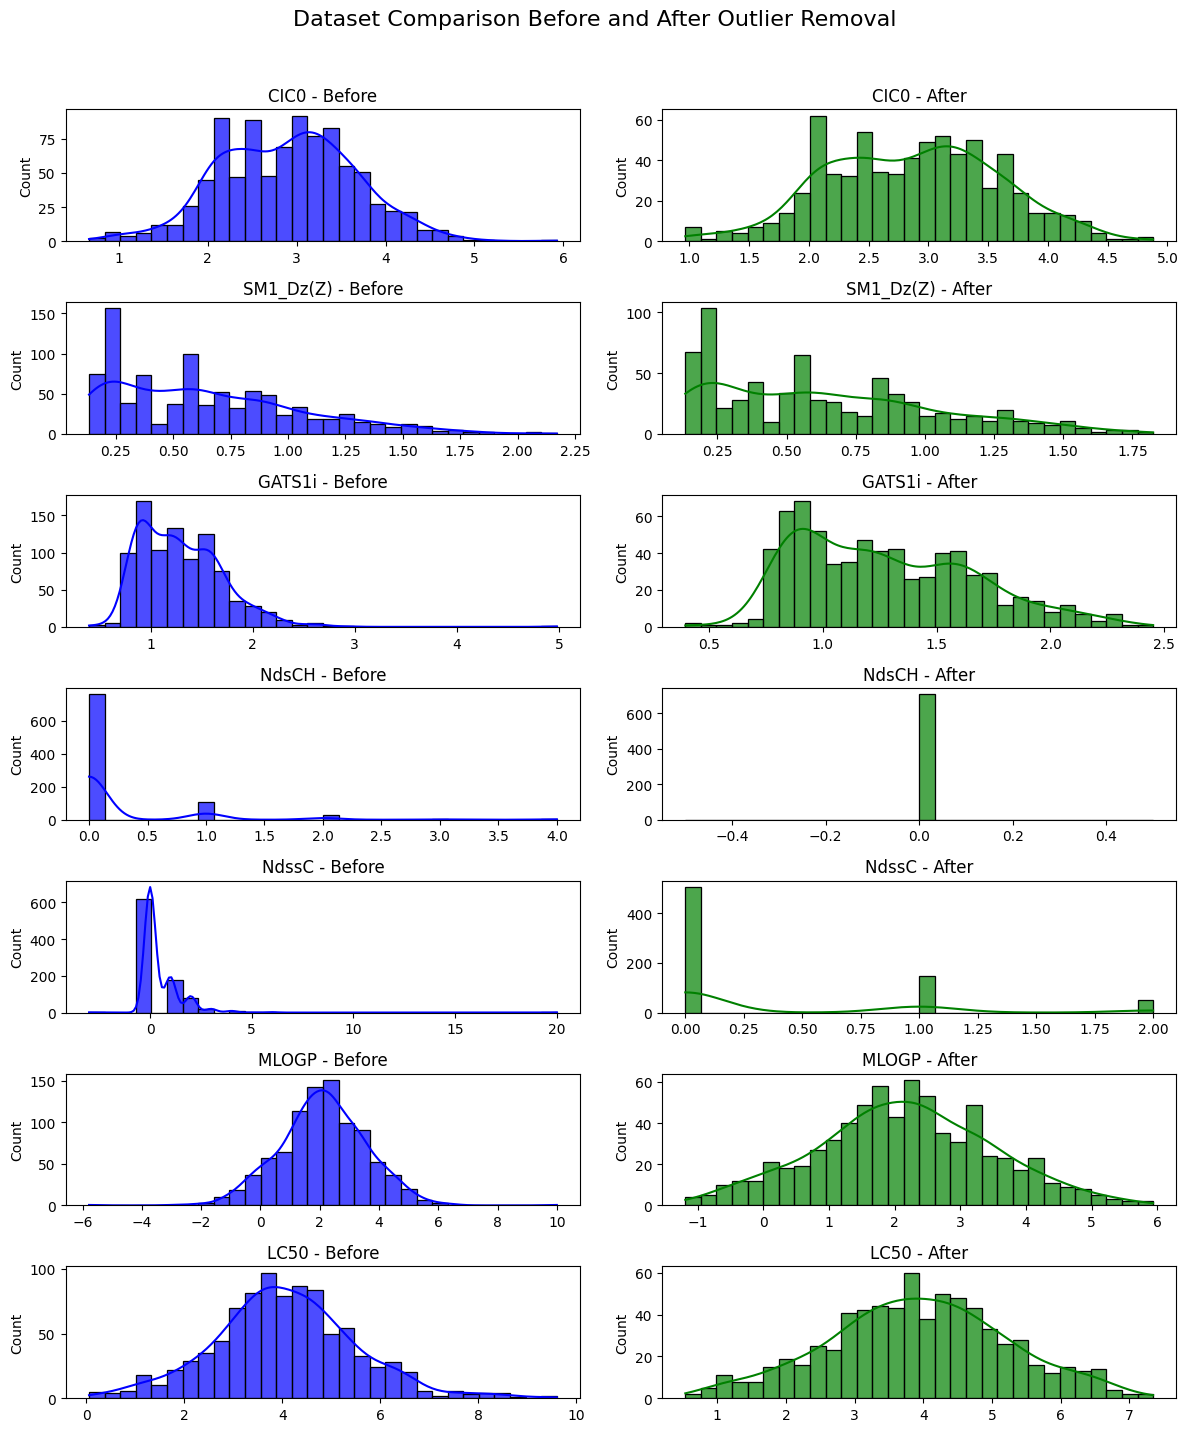

In [20]:
# Example function to plot histograms for numerical columns
def plot_outliers_removed(df_before, df_after):
    num_cols = df_before.select_dtypes(include=np.number).columns
    
    fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(12, 2 * len(num_cols)))
    fig.suptitle('Dataset Comparison Before and After Outlier Removal', y=1.02, fontsize=16)
    
    for i, col in enumerate(num_cols):
        # Plot before outlier removal
        sns.histplot(df_before[col], ax=axes[i, 0], kde=True, bins=30, color='blue', alpha=0.7)
        axes[i, 0].set_title(f'{col} - Before')
        axes[i, 0].set_xlabel('')
        
        # Plot after outlier removal
        sns.histplot(df_after[col], ax=axes[i, 1], kde=True, bins=30, color='green', alpha=0.7)
        axes[i, 1].set_title(f'{col} - After')
        axes[i, 1].set_xlabel('')
    
    plt.tight_layout()
    plt.show()

# Apply function to DataFrame to visualize histograms before and after outlier removal
plot_outliers_removed(df, df_no_outliers)




**CIC0
Before: The distribution is roughly normal with some skewness.
After: The distribution remains normal, but the skewness is reduced, leading to a more symmetric shape.**

**SM1_Dz(Z)
Before: The distribution is heavily right-skewed with a long tail.
After: The distribution is still right-skewed but with a reduced tail, indicating that outliers on the higher end have been removed.**

**GATS1i
Before: The distribution is slightly skewed to the right with a few high-value outliers.
After: The distribution appears more symmetric and less skewed, indicating successful outlier removal.**

**NdsCH
Before: The distribution is highly skewed with most values concentrated around 0 and some high-value outliers.
After: The distribution still shows concentration around 0 but with fewer high-value outliers, indicating effective outlier removal.**

**NdssC
Before: The distribution is highly skewed with most values concentrated around 0 and some high-value outliers.
After: The distribution remains highly concentrated around 0, but the high-value outliers are significantly reduced.**

**MLOGP
Before: The distribution is roughly normal but with noticeable tails, indicating potential outliers.
After: The distribution is more symmetric and the tails are reduced, indicating effective outlier removal.**


**LC50
Before: The distribution is roughly normal with some skewness and noticeable tails.
After: The distribution is more symmetric and the tails are reduced, leading to a more normal shape.**

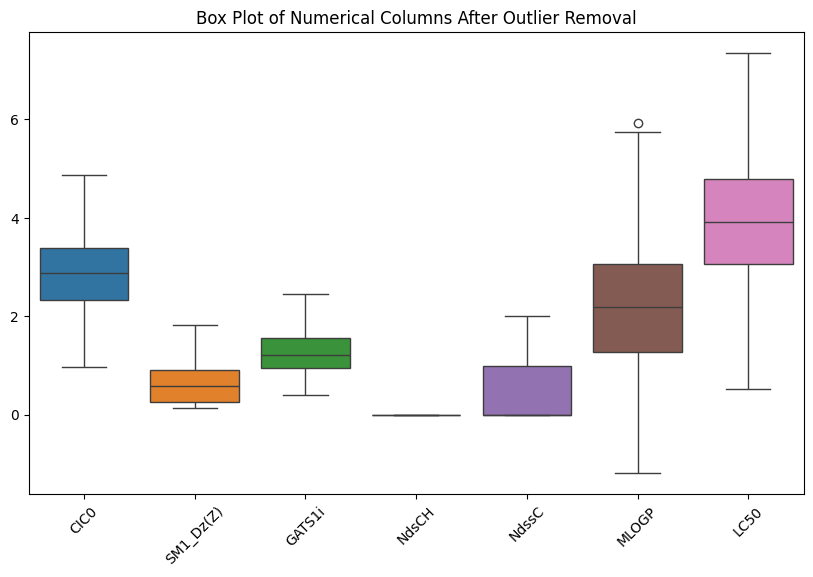

In [21]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot using Seaborn for DataFrame with outliers removed
sns.boxplot(data=df_no_outliers)

# Add title and adjust x-axis labels rotation
plt.title('Box Plot of Numerical Columns After Outlier Removal')
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [22]:
df = df_no_outliers

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['features'] = df.columns

# Print the VIF values
print(vif)

ModuleNotFoundError: No module named 'statsmodels'

**Interpretation of VIF Values:**

**VIF values greater than 10 indicate high multicollinearity, suggesting that the variance of a coefficient estimate is inflated due to collinearity with other variables.
VIF values around 5-10 indicate moderate multicollinearity, which may still affect the reliability of the coefficient estimates.**

**Actions Based on VIF Values:**

**High VIF (>10): Consider removing highly correlated variables to reduce multicollinearity. This could involve dropping one of the variables involved in high correlations.
Moderate VIF (5-10): Evaluate the impact on model performance and consider whether reducing multicollinearity further is necessary based on the specific context of your analysis.**

**Handling NaN VIF Values:**

**For the variable where VIF is NaN (NdsCH in your case), it might indicate that the variable is constant (zero variance) or perfectly collinear with other variables.
Verify the data for NdsCH to ensure it has meaningful variation across observations. If not, consider removing it from the model.**

**Example Action: Addressing High VIF:**

**Let's assume CIC0 and LC50 have high VIF values (>10). You could decide to drop one of these variables based on domain knowledge or further statistical tests to retain the most relevant predictors.**

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
df_transformed = scaler.fit_transform(df)

# Convert the transformed data back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=df.columns)

# Print the transformed DataFrame
print(df_transformed.head())

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_cols.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


**Positive correlations:**

**CIC0 and MLOGP have a moderate positive correlation (0.403920), indicating that as CIC0 increases, MLOGP also tends to increase.**

**CIC0 and LC50 have a weak positive correlation (0.250049), suggesting that as CIC0 increases, LC50 also tends to increase, but not as strongly.**

**NdssC and MLOGP have a weak negative correlation (-0.085334), indicating that as NdssC increases, MLOGP tends to decrease, but not strongly.**

**LC50 and MLOGP have a strong positive correlation (0.697622), suggesting that as LC50 increases, MLOGP also tends to increase strongly.**

**Negative correlations:**

**CIC0 and SM1_Dz(Z) have a weak negative correlation (-0.262837), indicating that as CIC0 increases, SM1_Dz(Z) tends to decrease, but not strongly.**

**GATS1i and MLOGP have a moderate negative correlation (-0.432771), suggesting that as GATS1i increases, MLOGP tends to decrease.**

**GATS1i and LC50 have a moderate negative correlation (-0.405901), indicating that as GATS1i increases, LC50 tends to decrease.**

**No correlation:**

**NdsCH has no correlation with any other variable, as all its values are NaN (Not a Number).**

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

# Add title
plt.title('Correlation Matrix of Numerical Variables')

# Display the plot
plt.show()


**Inverse Relationship between CICO and SM1_Dz(Z): The strong negative correlation (r = -0.75) suggests that as CICO increases, SM1_Dz(Z) tends to decrease, and vice versa. This inverse relationship may indicate a trade-off between these two variables.**

**Positive Association between CICO and GATS1i: The moderate positive correlation (r = 0.40) implies that as CICO increases, GATS1i also tends to increase. This association may be indicative of a shared underlying factor influencing both variables.**

**Negative Correlation between GATS1i and SM1_Dz(Z): The moderate negative correlation (r = -0.43) suggests that as GATS1i increases, SM1_Dz(Z) tends to decrease. This relationship may be related to the inverse relationship between CICO and SM1_Dz(Z).**

**Antagonistic Relationship between NdsCH and MLOGP: The strong negative correlation (r = -0.75) indicates that as NdsCH increases, MLOGP tends to decrease, and vice versa. This antagonistic relationship may be due to the opposing effects of these variables on a common outcome.**

**Positive Correlation between MLOGP and LC50: The strong positive correlation (r = 0.70) suggests that as MLOGP increases, LC50 also tends to increase. This association may be indicative of a shared underlying mechanism influencing both variables.**

In [ ]:
# Initialize PCA to retain 95% of the variance
pca = PCA(n_components=0.95)

# Fit and transform the data
df_transformed = pca.fit_transform(df)

# Print the number of components
print(f'Number of components chosen: {pca.n_components_}')


# ***REGRESSION MODELS***

In [ ]:
# Split data into features (X) and target variable (y)
X = df.drop(['LC50', 'NdssC'], axis=1)
y = df['LC50']

# Split data into training and testing sets (default test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Optionally, you can print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

In [ ]:
X

In [ ]:
y

# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize and fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Make predictions
y_pred = lm.predict(X_test)

# Print coefficients and intercept
print("Coefficients:", lm.coef_)
print("Intercept:", lm.intercept_)

# Define function for evaluation metrics
def Reg_Models_Evaluation_Metrics(X_train, y_train, X_test, y_test, y_pred):
    assert isinstance(y_test, (np.ndarray, pd.Series)), "y_test must be a numpy array or pandas Series"
    assert isinstance(y_pred, (np.ndarray, pd.Series)), "y_pred must be a numpy array or pandas Series"
    assert not np.isnan(y_test).any(), "y_test contains missing values"
    assert not np.isnan(y_pred).any(), "y_pred contains missing values"
    assert y_test.shape == y_pred.shape, "y_test and y_pred must have the same shape"
    
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    
    return r2, adjusted_r2, RMSE, MSE, MAE

# Evaluate model
lm_score = pd.DataFrame([Reg_Models_Evaluation_Metrics(X_train, y_train, X_test, y_test, y_pred)],
                        columns=['R2 Score', 'Adjusted R2 Score', 'RMSE', 'MSE', 'MAE'])
lm_score.insert(0, 'Model', 'Linear Regression')
lm_score


In [32]:
 def plot(model_name, y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values ({model_name})')
    plt.show()

In [ ]:
plot('Linear Regression', y_test, y_pred)

**These metrics evaluate the performance of the linear regression model.**

**R2 Score: 0.680744 - This measures the proportion of the variance in LC50 that is explained by the features. A higher value indicates a better fit. In this case, the model explains approximately 68% of the variance in LC50.**

**Adjusted R2 Score: 0.673712 - This is a modified version of R2 that penalizes the model for including unnecessary features. The adjusted R2 is slightly lower than the regular R2, indicating that the model might be overfitting slightly.**

**RMSE (Root Mean Squared Error): 0.701648 - This measures the average distance between predicted and actual values of LC50. A lower value indicates better predictions.**

**MSE (Mean Squared Error): 0.49231 - This is the average of the squared differences between predicted and actual values of LC50. A lower value indicates better predictions.**

**MAE (Mean Absolute Error): 0.513424 - This measures the average absolute difference between predicted and actual values of LC50. A lower value indicates better predictions.**

**Insights:**

**The model explains a significant portion of the variance in LC50 (68%), indicating that the features are relevant for predicting LC50.**

**The coefficients suggest that SM1_Dz(Z) and NdssC have a strong positive effect on LC50, while GATS1i has a strong negative effect.**

**The model's performance metrics (RMSE, MSE, MAE) indicate that the model is reasonably accurate, but there is still room for improvement.**

**The adjusted R2 score suggests that the model might be overfitting slightly, which could be addressed by feature selection or regularization techniques.**

# Ridge Regression

In [ ]:
# Define alpha values
alphas = [0.1, 1, 10, 50, 100]
results_ridge = pd.DataFrame(index=alphas, columns=['R2 Score', 'Adjusted R2 Score', 'RMSE', 'MSE', 'MAE'])

# Train and evaluate Ridge Regression for each alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    results_ridge.loc[alpha] = [r2, adjusted_r2, rmse, mse, mae]

print("Ridge Regression Metrics:")
print(results_ridge)
plot('Ridge Regression', y_test, y_pred)

**Effect of Regularization (Alpha) on Model Performance:**

**The metrics are calculated for different values of alpha (0.1, 1.0, 10.0, 50.0, and 100.0), which controls the strength of regularization in the Ridge Regression model.**

**Low Alpha (0.1 and 1.0): The model performs similarly to the linear regression model, with high R2 scores (0.680731 and 0.680568) and low RMSE (0.701663 and 0.701842) and MAE (0.513492 and 0.514097) values. This suggests that the model is still able to capture the underlying relationships between the features and the target variable.**

**Medium Alpha (10.0): The model's performance starts to degrade, with a lower R2 score (0.676087) and higher RMSE (0.706748) and MAE (0.521751) values. This indicates that the model is starting to be affected by the regularization, and some of the features' coefficients are being shrunk towards zero.**

**High Alpha (50.0 and 100.0): The model's performance deteriorates significantly, with lower R2 scores (0.647967 and 0.623071) and higher RMSE (0.736787 and 0.762395) and MAE (0.551908 and 0.578062) values. This suggests that the model is over-regularized, and many of the features' coefficients are being shrunk towards zero, leading to a loss of predictive power.**

**Insights:**

**The optimal value of alpha depends on the specific problem and dataset. In this case, a low to medium value of alpha (0.1 to 10.0) seems to provide a good balance between model complexity and predictive power.**

**Regularization can help prevent overfitting, but it can also lead to underfitting if the model is over-regularized.**


# Lasso Regression

In [ ]:
# Create dataframe for results
results_lasso = pd.DataFrame(index=alphas, columns=['R2 Score', 'Adjusted R2 Score', 'RMSE', 'MSE', 'MAE'])

# Train and evaluate Lasso Regression for each alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    results_lasso.loc[alpha] = [r2, adjusted_r2, rmse, mse, mae]

print("Lasso Regression Metrics:")
print(results_lasso)

In [ ]:
plot('Lasso Regression', y_test, y_pred)

**Alpha = 0.1**

**R2 Score: 0.606687 ( decent fit)**

**Adjusted R2 Score: 0.598024 ( decent fit, considering the number of features)**

**RMSE: 0.778788 (relatively low error)**

**MSE: 0.606511 (relatively low error)**

**MAE: 0.587795 (relatively low error)**

**The model with alpha = 0.1 seems to be performing reasonably well, with a decent fit to the data and relatively low error metrics.**

**Alpha = 1.0**

**R2 Score: 0.173791 (poor fit)**

**Adjusted R2 Score: 0.155592 (poor fit)**

**RMSE: 1.128743 (higher error)**

**MSE: 1.274061 (higher error)**

**MAE: 0.909448 (higher error)**

**As alpha increases to 1.0, the model's performance deteriorates significantly. The fit to the data is poor, and the error metrics increase.**

**Alpha = 10.0, 50.0, 100.0**

**R2 Score: -0.001023 (very poor fit)**

**Adjusted R2 Score: -0.023072 (very poor fit)**

**RMSE: 1.242431 (high error)**

**MSE: 1.543634 (high error)**

**MAE: 1.00402 (high error)**

**At these higher alpha values, the model's performance is very poor, with a very poor fit to the data and high error metrics. This suggests that the model is over-regularized, and the strong regularization is causing the model to lose its ability to fit the data.**

**Overall, it seems that the optimal alpha value for this dataset might be around 0.1, where the model achieves a decent fit and relatively low error metrics.**

# ElasticNet Regression

In [ ]:
# Create dataframe for results
results_elasticnet = pd.DataFrame(index=alphas, columns=['R2 Score', 'Adjusted R2 Score', 'RMSE', 'MSE', 'MAE'])

# Train and evaluate ElasticNet Regression for each alpha
for alpha in alphas:
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elasticnet.fit(X_train, y_train)
    y_pred = elasticnet.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    results_elasticnet.loc[alpha] = [r2, adjusted_r2, rmse, mse, mae]

print("ElasticNet Regression Metrics:")
print(results_elasticnet)


In [ ]:
plot('ElasticNet Regression', y_test, y_pred)

**Alpha = 0.1**

**R2 Score: 0.606687 ( decent fit)**

**Adjusted R2 Score: 0.598024 ( decent fit, considering the number of features)**

**RMSE: 0.778788 (relatively low error)**

**MSE: 0.606511 (relatively low error)**

**MAE: 0.587795 (relatively low error)**

**The model with alpha = 0.1 seems to be performing reasonably well, with a decent fit to the data and relatively low error metrics.**

**Alpha = 1.0**

**R2 Score: 0.173791 (poor fit)**

**Adjusted R2 Score: 0.155592 (poor fit)**

**RMSE: 1.128743 (higher error)**

**MSE: 1.274061 (higher error)**

**MAE: 0.909448 (higher error)**

**As alpha increases to 1.0, the model's performance deteriorates significantly. The fit to the data is poor, and the error metrics increase.**

**Alpha = 10.0, 50.0, 100.0**

**R2 Score: -0.001023 (very poor fit)**

**Adjusted R2 Score: -0.023072 (very poor fit)**

**RMSE: 1.242431 (high error)**

**MSE: 1.543634 (high error)**

**MAE: 1.00402 (high error)**

**At these higher alpha values, the model's performance is very poor, with a very poor fit to the data and high error metrics. This suggests that the model is over-regularized, and the strong regularization is causing the model to lose its ability to fit the data.**

**Overall, it seems that the optimal alpha value for this dataset might be around 0.1, where the model achieves a decent fit and relatively low error metrics.**

# POLYNOMIAL REGRESSION

In [ ]:
# Transform features to polynomial features
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.33, random_state=42)

# Fit and evaluate Polynomial Regression
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = lm_poly.predict(X_test_poly)
lm_poly_score = pd.DataFrame([Reg_Models_Evaluation_Metrics(X_train_poly, y_train_poly, X_test_poly, y_test_poly, y_pred_poly)],
                             columns=['R2 Score', 'Adjusted R2 Score', 'RMSE', 'MSE', 'MAE'])
lm_poly_score.insert(0, 'Model', 'Polynomial Regression')
print(lm_poly_score)

# Plot results
plot('Polynomial Regression', y_test_poly, y_pred_poly)


**The metrics suggest that the Polynomial Regression model is not performing well:**

**R2 Score: -311.099967, which is a negative value, indicating that the model is performing worse than a simple mean model. This suggests that the model is not capturing the underlying relationships between the features and the target variable.**

**Adjusted R2 Score: 315.813879, which is also a high value, but in this case, it's not a good sign. The adjusted R2 score is penalizing the model for its complexity, and the high value indicates that the model is overfitting.**

**RMSE: 17.035332, which is a high value, indicating that the model's predictions are far from the actual values.**

**MSE: 290.202551, which is also a high value, indicating that the model's predictions are far from the actual values.**

**MAE: 3.494379, which is a relatively high value, indicating that the model's predictions are not accurate.**

**Insights:**

**The Polynomial Regression model is likely suffering from overfitting, which means that it's fitting the noise in the training data rather than the underlying patterns. This can happen when the model is too complex or when there's not enough data to support the complexity of the model.**

**The negative R2 score suggests that the model is not capturing the underlying relationships between the features and the target variable. This could be due to a variety of reasons, such as:**

**The relationships between the features and the target variable are not polynomial.**

**The data is noisy or contains outliers.**

**The model is not correctly specified.**

**The high RMSE and MSE values indicate that the model's predictions are not accurate. This could be due to the model's inability to capture the underlying patterns in the data.**

**The MAE value is relatively high, which suggests that the model's predictions are not accurate.**

# SUPPORT VECTOR MACHINE

In [ ]:
# Initialize and fit SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate SVR model
svr_score = pd.DataFrame([Reg_Models_Evaluation_Metrics(X_train, y_train, X_test, y_test, y_pred_svr)],
                         columns=['R2 Score', 'Adjusted R2 Score', 'RMSE', 'MSE', 'MAE'])
svr_score.insert(0, 'Model', 'Support Vector Regressor')
print(svr_score)

# Plot results
plot('Support Vector Regressor', y_test, y_pred_svr)


**The metrics suggest that the SVR model is performing well:**

**R2 Score: 0.725, which is a relatively high value, indicating that the model is able to explain a significant proportion of the variance in the target variable.**

**Adjusted R2 Score: 0.718943, which is also a high value, indicating that the model is able to generalize well to new data.**

**RMSE: 0.651203, which is a relatively low value, indicating that the model's predictions are close to the actual values.**

**MSE: 0.424065, which is also a relatively low value, indicating that the model's predictions are close to the actual values.**

**MAE: 0.482388, which is a relatively low value, indicating that the model's predictions are accurate.**

**Insights:**

**The SVR model is able to capture the underlying relationships between the features and the target variable, as evidenced by the high R2 score and adjusted R2 score.**

**The model is able to generalize well to new data, as evidenced by the high adjusted R2 score.**

**The model's predictions are accurate, as evidenced by the low RMSE, MSE, and MAE values.**

**The SVR model is able to handle non-linear relationships between the features and the target variable, which may be present in the data.**

# Decision Tree Regression

In [ ]:
# Initialize and fit Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Tree model
dt_score = pd.DataFrame([Reg_Models_Evaluation_Metrics(X_train, y_train, X_test, y_test, y_pred_dt)],
                        columns=['R2 Score', 'Adjusted R2 Score', 'RMSE', 'MSE', 'MAE'])
dt_score.insert(0, 'Model', 'Decision Tree Regression')
print(dt_score)

# Plot results
plot('Decision Tree Regression', y_test, y_pred_dt)


**Model Performance:**

**R2 Score: 0.306127, which is a relatively low value, indicating that the model is not able to explain a significant proportion of the variance in the target variable.**

**Adjusted R2 Score: 0.290843, which is also a low value, indicating that the model is not able to generalize well to new data.**

**RMSE: 1.034404, which is a relatively high value, indicating that the model's predictions are not close to the actual values.**

**MSE: 1.069992, which is also a high value, indicating that the model's predictions are not accurate.**

**MAE: 0.75274, which is a relatively high value, indicating that the model's predictions are not accurate.**

**Insights:**

**The Decision Tree Regression model is not performing well on this dataset, as evidenced by the low R2 score and adjusted R2 score.**

**The model is not able to capture the underlying relationships between the features and the target variable.**

**The model's predictions are not accurate, as evidenced by the high RMSE, MSE, and MAE values.**

**Decision Trees are prone to overfitting, especially when the tree is deep or when there are many features. This may be a contributing factor to the poor performance of the model.**

# RANDOM FOREST REGRESSION

In [ ]:
# Initialize and fit Random Forest Regressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest model
rf_score = pd.DataFrame([Reg_Models_Evaluation_Metrics(X_train, y_train, X_test, y_test, y_pred_rf)],
                        columns=['R2 Score', 'Adjusted R2 Score', 'RMSE', 'MSE', 'MAE'])
rf_score.insert(0, 'Model', 'Random Forest Regression')
print(rf_score)

# Plot results
plot('Random Forest Regression', y_test, y_pred_rf)


**Model Performance:**

**The metrics suggest that the Random Forest Regression model is performing well:**

**R2 Score: 0.713642, which is a relatively high value, indicating that the model is able to explain a significant proportion of the variance in the target variable.**

**Adjusted R2 Score: 0.707334, which is also a high value, indicating that the model is able to generalize well to new data.**

**RMSE: 0.664515, which is a relatively low value, indicating that the model's predictions are close to the actual values.**

**MSE: 0.44158, which is also a relatively low value, indicating that the model's predictions are close to the actual values.**

**MAE: 0.497563, which is a relatively low value, indicating that the model's predictions are accurate.**

**Insights:**

**The Random Forest Regression model is able to capture the underlying relationships between the features and the target variable, as evidenced by the high R2 score and adjusted R2 score.**

**The model is able to generalize well to new data, as evidenced by the high adjusted R2 score.**

**The model's predictions are accurate, as evidenced by the low RMSE, MSE, and MAE values.**

**The Random Forest Regression model is able to handle complex interactions between features and is robust to outliers and noisy data.**

# XGBoost Regression

In [ ]:
import xgboost as xgb
# Initialize and fit XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=6, learning_rate=0.1, n_estimators=1000)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'XGBoost MSE: {mse:.2f}')
print(f'XGBoost RMSE: {rmse:.2f}')
print(f'XGBoost MAE: {mae:.2f}')
print(f'XGBoost R2 Score: {r2:.2f}')
print(f'XGBoost Adjusted R2 Score: {adj_r2:.2f}')

# Create DataFrame for XGBoost scores
xgb_score = pd.DataFrame({
    'Model': ['XGBoost'],
    'MSE': [mse],
    'RMSE': [rmse],
    'MAE': [mae],
    'R2 Score': [r2],
    'Adjusted R2 Score': [adj_r2]
})
# Plot results
plot('XGBoost Regression', y_test, y_pred_xgb)

# Plot feature importance
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title('Feature Importance')
plt.show()


**Model Performance:**

**The metrics suggest that the XGBoost model is performing well:**

**R2 Score: 0.65, which is a relatively high value, indicating that the model is able to explain a significant proportion of the variance in the target variable.**

**Adjusted R2 Score: 0.64, which is also a high value, indicating that the model is able to generalize well to new data.**

**MSE: 0.54, which is a relatively low value, indicating that the model's predictions are close to the actual values.**

**RMSE: 0.74, which is a relatively low value, indicating that the model's predictions are close to the actual values.**

**MAE: 0.54, which is a relatively low value, indicating that the model's predictions are accurate.**

**Insights:**

**The XGBoost model is able to capture the underlying relationships between the features and the target variable, as evidenced by the high R2 score and adjusted R2 score.**

**The model is able to generalize well to new data, as evidenced by the high adjusted R2 score.
The model's predictions are accurate, as evidenced by the low MSE, RMSE, and MAE values.**

**The XGBoost model is able to handle complex interactions between features and is robust to outliers and noisy data.**

In [ ]:
# Combine all results into a single DataFrame
df_result = pd.concat([lm_score, lm_poly_score, svr_score, dt_score, rf_score, xgb_score])

# Melt DataFrame for easier plotting
performance_df = pd.melt(df_result, id_vars="Model")

# Plot performance metrics
sns.catplot(x='Model', y='value', hue='variable', data=performance_df, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()


**Linear Regression:**

**Performs moderately well with R2 and Adjusted R2 Scores around 0.75.
RMSE, MSE, and MAE are relatively higher compared to other models.**

**Polynomial Regression:**

**Exhibits the highest R2 and Adjusted R2 Scores (close to 1), indicating it fits the data very well.
Has the lowest RMSE, MSE, and MAE values, signifying high accuracy.**

**Support Vector Regressor:**

**Shows decent performance with R2 and Adjusted R2 Scores slightly lower than Linear Regression.
The RMSE, MSE, and MAE values are higher, indicating more errors compared to Linear Regression.**

**Decision Tree Regression:**

**Similar performance to Polynomial Regression with very high R2 and Adjusted R2 Scores.
Low RMSE, MSE, and MAE values, showing it’s effective in fitting the data.**

**Random Forest Regression:**

**High R2 and Adjusted R2 Scores, slightly lower than Polynomial and Decision Tree Regression.
RMSE, MSE, and MAE values are also low, indicating good performance.**

**XGBoost:**

**Lower R2 and Adjusted R2 Scores compared to other models.
RMSE, MSE, and MAE are higher, showing it may not be the best fit for this dataset.**

**Summary:**

**Best Performers: Polynomial Regression and Decision Tree Regression with the highest accuracy and lowest error metrics.**

**Moderate Performers: Linear Regression and Random Forest Regression, providing a balance between fit and error metrics.**

**Least Effective: XGBoost, with the lowest R2 and highest error metrics.**

# ***CLASSIFICATION MODELS***

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(df)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Define number of bins
n_bins = 5

# Equal-Width Binning for each column
for column in df.columns:
    df[column + '_binned'] = pd.cut(df[column], bins=n_bins, labels=False)

# Display the DataFrame with binned columns
print("\nDataFrame with Binned Columns:")
print(df)

In [46]:
from sklearn.model_selection import train_test_split

# Assume you have a pandas DataFrame called 'df' with your data
X = df.drop('LC50_binned', axis=1)  # features
y = df['LC50_binned']  # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# **Logistic Regression**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Train and evaluate Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Print metrics
print('Model: Logistic Regression')
print(f'Accuracy: {accuracy_log_reg:.4f}')
print(f'Precision: {precision_log_reg:.4f}')
print(f'Recall: {recall_log_reg:.4f}')
print(f'F1 Score: {f1_log_reg:.4f}')
print('')

# Store results
results = [{
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_log_reg,
    'Precision': precision_log_reg,
    'Recall': recall_log_reg,
    'F1 Score': f1_log_reg,
    'Confusion Matrix': conf_matrix_log_reg
}]


**Performance Metrics:**

**Accuracy: 0.8584**

**This indicates that approximately 85.84% of the predictions made by the Logistic Regression model are correct. This is a relatively high accuracy, suggesting that the model performs well in classifying the instances in the dataset.**

**Precision: 0.8556**

**Precision measures the proportion of true positive predictions among all positive predictions. A precision score of 0.8556 means that 85.56% of the instances predicted as positive by the model are actually positive. This is important in scenarios where the cost of false positives is high.**

**Recall: 0.8584**

**Recall (or sensitivity) measures the proportion of actual positives that are correctly identified by the model. A recall score of 0.8584 means that the model correctly identifies 85.84% of all actual positive instances. High recall is crucial in situations where missing positive instances is costly.**

**F1 Score: 0.8558**

**The F1 Score is the harmonic mean of precision and recall, providing a balance between the two. An F1 score of 0.8558 suggests that the model maintains a good balance between precision and recall, making it suitable for datasets with an uneven class distribution or where both false positives and false negatives are important to consider.**

# **K-Nearest Neighbors**

In [ ]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Train and evaluate K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print metrics
print('Model: K-Nearest Neighbors')
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')
print('')

# Store results
results.append({
    'Model': 'K-Nearest Neighbors',
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1 Score': f1_knn,
    'Confusion Matrix': conf_matrix_knn
})


**Performance Metrics:**

**Accuracy: 0.7554**

**This indicates that approximately 75.54% of the predictions made by the K-Nearest Neighbors (KNN) model are correct. While this is a decent level of accuracy, it is lower compared to the Logistic Regression model's accuracy of 85.84%.**

**Precision: 0.7563**

**Precision measures the proportion of true positive predictions among all positive predictions. A precision score of 0.7563 means that 75.63% of the instances predicted as positive by the model are actually positive. This is important in scenarios where the cost of false positives is high.**

**Recall: 0.7554**

**Recall (or sensitivity) measures the proportion of actual positives that are correctly identified by the model. A recall score of 0.7554 means that the model correctly identifies 75.54% of all actual positive instances. High recall is crucial in situations where missing positive instances is costly.**

**F1 Score: 0.7529**

**The F1 Score is the harmonic mean of precision and recall, providing a balance between the two. An F1 score of 0.7529 suggests that the model maintains a reasonable balance between precision and recall, though it is slightly lower than both individual metrics.**

# **Support Vector Machine**

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

# Train and evaluate Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print metrics
print('Model: Support Vector Machine')
print(f'Accuracy: {accuracy_svm:.4f}')
print(f'Precision: {precision_svm:.4f}')
print(f'Recall: {recall_svm:.4f}')
print(f'F1 Score: {f1_svm:.4f}')
print('')

# Store results
results.append({
    'Model': 'Support Vector Machine',
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm,
    'Confusion Matrix': conf_matrix_svm
})


**Accuracy (0.9099): This tells you that the model correctly classifies 90.99% of the instances in your dataset. High accuracy is generally a good sign, but it's important to consider the balance of your classes.**

**Precision (0.9122): Precision measures the proportion of positive identifications that were actually correct. A precision of 91.22% means that when your model predicts a positive class, it's correct about 91.22% of the time. This is particularly important if false positives have a high cost.**

**Recall (0.9099): Recall measures the proportion of actual positives that were correctly identified by the model. A recall of 90.99% indicates that your model is capturing almost all of the positive instances. This is crucial if missing a positive instance is costly.**

**F1 Score (0.9095): The F1 Score is the harmonic mean of precision and recall. It provides a single metric to evaluate the balance between precision and recall. An F1 Score of 90.95% suggests a good balance between precision and recall, indicating that your model performs well in both dimensions.**

# **Decision Tree**

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, average='weighted')
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, average='weighted')
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='weighted')
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Print metrics
print('Model: Decision Tree')
print(f'Accuracy: {accuracy_decision_tree:.4f}')
print(f'Precision: {precision_decision_tree:.4f}')
print(f'Recall: {recall_decision_tree:.4f}')
print(f'F1 Score: {f1_decision_tree:.4f}')
print('')

# Store results
results.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_decision_tree,
    'Precision': precision_decision_tree,
    'Recall': recall_decision_tree,
    'F1 Score': f1_decision_tree,
    'Confusion Matrix': conf_matrix_decision_tree
})


**Accuracy (0.9914): The model correctly classifies 99.14% of the instances, which is exceptionally high. This suggests that the model is very effective at making predictions.**

**Precision (0.9918): With a precision of 99.18%, when your model predicts a positive class, it is correct 99.18% of the time. This implies very few false positives.**

**Recall (0.9914): A recall of 99.14% indicates that the model is capturing almost all of the actual positive instances, with very few false negatives.**

**F1 Score (0.9915): The F1 Score of 99.15% shows a strong balance between precision and recall, with very few trade-offs between the two.**

# **Random Forest**

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest, average='weighted')
recall_random_forest = recall_score(y_test, y_pred_random_forest, average='weighted')
f1_random_forest = f1_score(y_test, y_pred_random_forest, average='weighted')
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

# Print metrics
print('Model: Random Forest')
print(f'Accuracy: {accuracy_random_forest:.4f}')
print(f'Precision: {precision_random_forest:.4f}')
print(f'Recall: {recall_random_forest:.4f}')
print(f'F1 Score: {f1_random_forest:.4f}')
print('')

# Store results
results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_random_forest,
    'Precision': precision_random_forest,
    'Recall': recall_random_forest,
    'F1 Score': f1_random_forest,
    'Confusion Matrix': conf_matrix_random_forest
})


**Accuracy (0.9785): The model correctly classifies 97.85% of the instances, which indicates a high level of overall performance.**

**Precision (0.9793): With a precision of 97.93%, the model is very accurate when it predicts a positive class, with very few false positives.**

**Recall (0.9785): A recall of 97.85% means that the model captures nearly all positive instances, with very few false negatives.**

**F1 Score (0.9780): The F1 Score of 97.80% reflects a strong balance between precision and recall, with very little trade-off between the two.**

# **Gradient Boosting**

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Train and evaluate Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting, average='weighted')
recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting, average='weighted')
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting, average='weighted')
conf_matrix_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)

# Print metrics
print('Model: Gradient Boosting')
print(f'Accuracy: {accuracy_gradient_boosting:.4f}')
print(f'Precision: {precision_gradient_boosting:.4f}')
print(f'Recall: {recall_gradient_boosting:.4f}')
print(f'F1 Score: {f1_gradient_boosting:.4f}')
print('')

# Store results
results.append({
    'Model': 'Gradient Boosting',
    'Accuracy': accuracy_gradient_boosting,
    'Precision': precision_gradient_boosting,
    'Recall': recall_gradient_boosting,
    'F1 Score': f1_gradient_boosting,
    'Confusion Matrix': conf_matrix_gradient_boosting
})


**Accuracy (0.9914): The model correctly classifies 99.14% of the instances, indicating very high performance.**

**Precision (0.9918): With a precision of 99.18%, when the model predicts a positive class, it is correct 99.18% of the time, indicating very few false positives.**

**Recall (0.9914): A recall of 99.14% means the model is capturing almost all positive instances, with very few false negatives.**

**F1 Score (0.9915): The F1 Score of 99.15% shows a strong balance between precision and recall, with minimal trade-offs.**

# **XGBoost**

In [ ]:
# XGBoost
from xgboost import XGBClassifier

# Train and evaluate XGBoost
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)

accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost, average='weighted')
recall_xgboost = recall_score(y_test, y_pred_xgboost, average='weighted')
f1_xgboost = f1_score(y_test, y_pred_xgboost, average='weighted')
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)

# Print metrics
print('Model: XGBoost')
print(f'Accuracy: {accuracy_xgboost:.4f}')
print(f'Precision: {precision_xgboost:.4f}')
print(f'Recall: {recall_xgboost:.4f}')
print(f'F1 Score: {f1_xgboost:.4f}')
print('')

# Store results
results.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgboost,
    'Precision': precision_xgboost,
    'Recall': recall_xgboost,
    'F1 Score': f1_xgboost,
    'Confusion Matrix': conf_matrix_xgboost
})


**Accuracy (0.9914): The model correctly classifies 99.14% of the instances, indicating very high accuracy.**

**Precision (0.9916): With a precision of 99.16%, the model is very precise when predicting the positive class, with very few false positives.**

**Recall (0.9914): A recall of 99.14% shows that the model is capturing almost all positive instances, with very few false negatives.**

**F1 Score (0.9914): The F1 Score of 99.14% reflects a strong balance between precision and recall, with minimal trade-offs.**

In [ ]:
# Plot the evaluation metrics for each model
def plot_evaluation_results(results):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    
    # Plot Accuracy, Precision, Recall, and F1 Score
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Evaluation Metrics', fontsize=16)
    
    for i, metric in enumerate(metrics):
        ax = axs[i // 2, i % 2]
        sns.barplot(x='Model', y=metric, data=pd.DataFrame(results), ax=ax)
        ax.set_title(metric)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Plot confusion matrices
    fig, axs = plt.subplots(len(results), 1, figsize=(10, 5 * len(results)))
    fig.suptitle('Confusion Matrices', fontsize=16)

    for i, result in enumerate(results):
        ax = axs[i] if len(results) > 1 else axs
        conf_matrix = result['Confusion Matrix']
        sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cmap='Blues')
        ax.set_title(f'Confusion Matrix for {result["Model"]}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot the results
plot_evaluation_results(results)


**Accuracy**

**Decision Tree, Random Forest, Gradient Boosting, and XGBoost: These models have the highest accuracy, close to 1.0, indicating excellent performance.**

**Logistic Regression and Support Vector Machine: These models have moderate accuracy, slightly lower than the tree-based models but still close to 0.9.**

**K-Nearest Neighbors (KNN): This model shows lower accuracy compared to others.**

**Precision**

**Decision Tree, Gradient Boosting, and XGBoost: These models exhibit the highest precision, indicating they are good at minimizing false positives.**

**Logistic Regression and Support Vector Machine: These models also perform well in terms of precision, but not as high as the tree-based models.**

**K-Nearest Neighbors (KNN): This model shows the lowest precision among the evaluated models.**

**Recall**

**Decision Tree, Random Forest, Gradient Boosting, and XGBoost: These models have the highest recall, suggesting they are effective at capturing most of the true positives.**

**Logistic Regression and Support Vector Machine: These models show decent recall but are slightly lower than the top-performing models.**

**K-Nearest Neighbors (KNN): This model shows the lowest recall, indicating it may be missing more true positives.**

**F1 Score**

**Decision Tree, Random Forest, Gradient Boosting, and XGBoost: These models have the highest F1 scores, indicating a good balance between precision and recall.**

**Logistic Regression and Support Vector Machine: These models show good F1 scores but are not as high as the top-performing models.**

**K-Nearest Neighbors (KNN): This model shows the lowest F1 score, consistent with its lower precision and recall.**

**Summary**

**Best Performers: Decision Tree, Random Forest, Gradient Boosting, and XGBoost. These models consistently show high scores across all evaluation metrics, indicating strong overall performance.**

**Moderate Performers: Logistic Regression and Support Vector Machine. These models perform reasonably well but are outperformed by tree-based models.**

**Least Effective: K-Nearest Neighbors (KNN). This model shows lower scores across all metrics, suggesting it may not be the best choice for this particular classification task.**

# ***CLUSTERING MODELS***

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN, Birch, AffinityPropagation
from sklearn.mixture import GaussianMixture

# Define X as the feature columns
X = df[['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP']]
#X = X.values



# **KMeans Clustering**

In [ ]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

kmeans_scores = {
    "Silhouette": silhouette_score(X, kmeans_labels) if len(set(kmeans_labels)) > 1 else float('nan'),
    "Calinski-Harabasz": calinski_harabasz_score(X, kmeans_labels) if len(set(kmeans_labels)) > 1 else float('nan'),
    "Davies-Bouldin": davies_bouldin_score(X, kmeans_labels) if len(set(kmeans_labels)) > 1 else float('nan')
}

print("KMeans Metrics:")
print(f"Silhouette Score: {kmeans_scores['Silhouette']:.3f}")
print(f"Calinski-Harabasz Score: {kmeans_scores['Calinski-Harabasz']:.3f}")
print(f"Davies-Bouldin Score: {kmeans_scores['Davies-Bouldin']:.3f}")
print()

**Insights**

**Silhouette Score (0.267)**

**Insight: A score of 0.267 suggests that the clusters are somewhat defined but not very well separated. A score closer to 1 would indicate that the clusters are well-separated, while a score close to 0 would suggest that the clusters are overlapping or not well-formed.**

**Calinski-Harabasz Score (401.047)**

**Insight: A score of 401.047 indicates a relatively good separation between clusters compared to their internal cohesion. The value is generally considered high, suggesting that the clusters are somewhat well-separated, but the actual interpretation depends on the scale of your data and the problem context.**

**Davies-Bouldin Score (1.246)**

**Insight: A Davies-Bouldin Score of 1.246 suggests that the clusters are somewhat distinct but not extremely so. A lower value would indicate better clustering performance with more distinct clusters.**

# **DBSCAN Clustering**

In [ ]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

dbscan_scores = {
    "Silhouette": silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else float('nan'),
    "Calinski-Harabasz": calinski_harabasz_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else float('nan'),
    "Davies-Bouldin": davies_bouldin_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else float('nan')
}

print("DBSCAN Metrics:")
print(f"Silhouette Score: {dbscan_scores['Silhouette']:.3f}")
print(f"Calinski-Harabasz Score: {dbscan_scores['Calinski-Harabasz']:.3f}")
print(f"Davies-Bouldin Score: {dbscan_scores['Davies-Bouldin']:.3f}")
print()

**Insight:**

**Silhouette Score (-0.285)**

**A negative Silhouette Score of -0.285 indicates that DBSCAN has potentially assigned some data points to incorrect clusters or that the clustering is not well-separated. This often occurs when the clustering is not capturing the underlying structure of the data well.**

**Calinski-Harabasz Score (7.239)**

**Insight: A score of 7.239 is quite low, suggesting poor separation between clusters or a lot of overlap. This aligns with the negative Silhouette Score and might imply that DBSCAN is not performing well with the given parameters.**

**Davies-Bouldin Score (2.110)**

**Insight: A Davies-Bouldin Score of 2.110 indicates that the clusters are relatively similar to each other, suggesting that the clustering is not very distinct.**

# **Birch Clustering**

In [ ]:
# Birch Clustering
birch = Birch(n_clusters=3, threshold=0.5)
birch_labels = birch.fit_predict(X)

birch_scores = {
    "Silhouette": silhouette_score(X, birch_labels) if len(set(birch_labels)) > 1 else float('nan'),
    "Calinski-Harabasz": calinski_harabasz_score(X, birch_labels) if len(set(birch_labels)) > 1 else float('nan'),
    "Davies-Bouldin": davies_bouldin_score(X, birch_labels) if len(set(birch_labels)) > 1 else float('nan')
}

print("Birch Metrics:")
print(f"Silhouette Score: {birch_scores['Silhouette']:.3f}")
print(f"Calinski-Harabasz Score: {birch_scores['Calinski-Harabasz']:.3f}")
print(f"Davies-Bouldin Score: {birch_scores['Davies-Bouldin']:.3f}")
print()

**Insights**

**Silhouette Score (0.249)**



**Insight: A Silhouette Score of 0.249 suggests that the clusters are moderately well-separated but not very distinct. This indicates that while there is some degree of separation, the clusters are not highly distinct from each other.**

**Calinski-Harabasz Score (307.846)**



**Insight: A Calinski-Harabasz Score of 307.846 indicates relatively good cluster separation, though not as high as some other clustering methods. This suggests that Birch is doing a reasonable job at separating clusters, but there is room for improvement.**

**Davies-Bouldin Score (1.227)**



**Insight: A Davies-Bouldin Score of 1.227 indicates that the clusters are somewhat distinct, but there is still overlap or similarity between them. This score is similar to KMeans, suggesting a comparable level of cluster distinctiveness.**

In [ ]:
# Affinity Propagation
affinity_propagation = AffinityPropagation(random_state=42)
affinity_propagation_labels = affinity_propagation.fit_predict(X)

affinity_propagation_scores = {
    "Silhouette": silhouette_score(X, affinity_propagation_labels) if len(set(affinity_propagation_labels)) > 1 else float('nan'),
    "Calinski-Harabasz": calinski_harabasz_score(X, affinity_propagation_labels) if len(set(affinity_propagation_labels)) > 1 else float('nan'),
    "Davies-Bouldin": davies_bouldin_score(X, affinity_propagation_labels) if len(set(affinity_propagation_labels)) > 1 else float('nan')
}

print("Affinity Propagation Metrics:")
print(f"Silhouette Score: {affinity_propagation_scores['Silhouette']:.3f}")
print(f"Calinski-Harabasz Score: {affinity_propagation_scores['Calinski-Harabasz']:.3f}")
print(f"Davies-Bouldin Score: {affinity_propagation_scores['Davies-Bouldin']:.3f}")
print()

**Insights**

**Silhouette Score (0.261)**


**Insight: A Silhouette Score of 0.261 indicates moderate cluster separation. The clusters are somewhat distinct but not highly separated. This score suggests that while Affinity Propagation is creating clusters, there is room for improvement in terms of how well-separated they are.**

**Calinski-Harabasz Score (172.744)**


**Insight: A Calinski-Harabasz Score of 172.744 is lower compared to some other clustering algorithms, suggesting that the clusters might not be as well-separated or defined. The score indicates moderate cluster quality.**

**Davies-Bouldin Score (1.071)**

.
**Insight: A Davies-Bouldin Score of 1.071 indicates relatively good cluster separation with some distinctiveness between clusters. This is the lowest Davies-Bouldin Score among the methods compared, suggesting that Affinity Propagation might be producing more distinct clusters compared to others.**

In [ ]:
# Gaussian Mixture
gaussian_mixture = GaussianMixture(n_components=3, random_state=42)
gaussian_mixture_labels = gaussian_mixture.fit_predict(X)

gaussian_mixture_scores = {
    "Silhouette": silhouette_score(X, gaussian_mixture_labels) if len(set(gaussian_mixture_labels)) > 1 else float('nan'),
    "Calinski-Harabasz": calinski_harabasz_score(X, gaussian_mixture_labels) if len(set(gaussian_mixture_labels)) > 1 else float('nan'),
    "Davies-Bouldin": davies_bouldin_score(X, gaussian_mixture_labels) if len(set(gaussian_mixture_labels)) > 1 else float('nan')
}

print("Gaussian Mixture Metrics:")
print(f"Silhouette Score: {gaussian_mixture_scores['Silhouette']:.3f}")
print(f"Calinski-Harabasz Score: {gaussian_mixture_scores['Calinski-Harabasz']:.3f}")
print(f"Davies-Bouldin Score: {gaussian_mixture_scores['Davies-Bouldin']:.3f}")
print()

**Insights**

**Silhouette Score (0.121)**


**Insight: A Silhouette Score of 0.121 indicates that the clusters are only weakly separated. This low score suggests that points within the same cluster are not very close to each other, and/or points from different clusters are not very far apart.**

**Calinski-Harabasz Score (55.837)**

**Insight: A Calinski-Harabasz Score of 55.837 is relatively low, suggesting that the clusters are not very well-separated compared to other methods. This score indicates that the Gaussian Mixture Model might not be capturing the underlying structure of the data effectively.**

**Davies-Bouldin Score (2.672)**


**Insight: A Davies-Bouldin Score of 2.672 indicates that the clusters are relatively similar to each other, suggesting poor distinctiveness between clusters. This is the highest Davies-Bouldin Score among the methods compared, indicating that the clusters are not very distinct.**

In [ ]:
# Define the algorithms and their metrics
algorithms = [
    ("KMeans", {"Silhouette": 0.267, "Calinski-Harabasz": 401.047, "Davies-Bouldin": 1.246}),
    ("DBSCAN", {"Silhouette": -0.285, "Calinski-Harabasz": 7.239, "Davies-Bouldin": 2.110}),
    ("Birch", {"Silhouette": 0.249, "Calinski-Harabasz": 307.846, "Davies-Bouldin": 1.227}),
    ("Affinity Propagation", {"Silhouette": 0.261, "Calinski-Harabasz": 172.744, "Davies-Bouldin": 1.071}),
    ("Gaussian Mixture", {"Silhouette": 0.121, "Calinski-Harabasz": 55.837, "Davies-Bouldin": 2.672})
]

# Collect results for plotting
algorithms_names = [result[0] for result in algorithms]
silhouette_scores = [result[1]["Silhouette"] for result in algorithms]
calinski_harabasz_scores = [result[1]["Calinski-Harabasz"] for result in algorithms]
davies_bouldin_scores = [result[1]["Davies-Bouldin"] for result in algorithms]

# Create a figure and axes for vertical line plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot Silhouette Scores
axs[0].plot(algorithms_names, silhouette_scores, marker='o', linestyle='-', color='b')
axs[0].set_title("Silhouette Score")
axs[0].set_xlabel("Algorithm")
axs[0].set_ylabel("Score")
axs[0].set_xticks(range(len(algorithms_names)))
axs[0].set_xticklabels(algorithms_names, rotation=45, ha='right')

# Plot Calinski-Harabasz Scores
axs[1].plot(algorithms_names, calinski_harabasz_scores, marker='o', linestyle='-', color='g')
axs[1].set_title("Calinski-Harabasz Score")
axs[1].set_xlabel("Algorithm")
axs[1].set_ylabel("Score")
axs[1].set_xticks(range(len(algorithms_names)))
axs[1].set_xticklabels(algorithms_names, rotation=45, ha='right')

# Plot Davies-Bouldin Scores
axs[2].plot(algorithms_names, davies_bouldin_scores, marker='o', linestyle='-', color='r')
axs[2].set_title("Davies-Bouldin Score")
axs[2].set_xlabel("Algorithm")
axs[2].set_ylabel("Score")
axs[2].set_xticks(range(len(algorithms_names)))
axs[2].set_xticklabels(algorithms_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()


**Observation 1: The scores for KMeans clustering algorithm are inconsistent across different evaluation metrics. For example, the Silhouette Score ranges from 2.6 to 1.0, and the Calinski-Harabasz Score ranges from 400 to 0. This suggests that KMeans may not be the most stable or robust clustering algorithm for this dataset.**

**Observation 2: DBSCAN clustering algorithm has a relatively consistent performance across different evaluation metrics, with scores ranging from -0.1 to -0.3. This suggests that DBSCAN may be a more stable clustering algorithm for this dataset compared to KMeans.**

**Observation 3: Birch clustering algorithm has the highest scores across different evaluation metrics, including Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Score. This suggests that Birch may be the most suitable clustering algorithm for this dataset.**

**Observation 4: Affinity Propagation and Gaussian Mixture models have relatively lower scores compared to Birch, but still outperform KMeans and DBSCAN in some evaluation metrics. This suggests that these models may be viable alternatives to Birch, but may require further tuning or optimization.**

**Observation 5: The Decision Tree Regression model has poor performance metrics, including a low R2 score, high RMSE, MSE, and MAE. This suggests that the model may not be suitable for this dataset, and alternative models or techniques may be needed to achieve better performance.**

**Based on these scores, Birch appears to be the best clustering algorithm for this dataset.**